# K-Means Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('kr_2.csv', sep=';')
df.head(20)

,RetailSpace,Type,NumberOfReviewInGoogle,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,0,0,42.820513,0,5211.000000,15610.000000,1,0,0,1,0
1,1,0,8.000000,1,2424.000000,12600.000000,1,1,0,0,0
2,2,1,42.820513,2,3868.000000,12600.000000,1,0,1,1,0
3,3,1,42.820513,3,4546.000000,13930.000000,1,0,0,1,0
4,1,1,42.820513,4,3244.000000,16030.000000,0,0,0,0,0
5,4,0,9.000000,5,2560.000000,12320.000000,0,0,0,1,0
6,5,0,21.000000,6,1842.000000,16100.000000,0,0,1,0,1
7,6,0,227.000000,7,412.000000,12180.000000,0,0,0,1,1
8,7,0,42.820513,8,233.000000,13930.000000,0,0,0,0,0
9,8,0,17.000000,9,978.000000,14560.000000,0,0,1,0,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['RetailSpace','Type','NumberOfReviewInGoogle','The_average_number_of_units_in_the_check','human_traffic','AverageIncomeOfThePopulation','Stop_GT','The_final_stop_of_the_GT','Crosswalk','Specialized_bread','Success']).round()

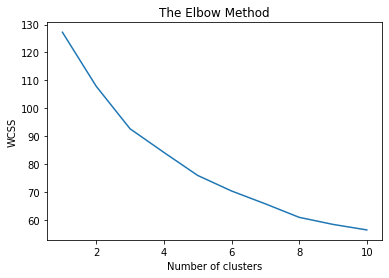

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

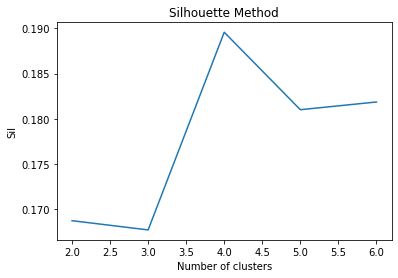

2:0.16874733987532886
3:0.1677266627697577
4:0.18957397614884647
5:0.1810133789640848
6:0.18186497702735585


In [5]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Данный метод предлагает оптимальный выделение 4-ех кластерной модели. Поскольку данные результаты будет интеесно интерпретировать и по исходной дендрограмме так же было предложено 4 кластера.

In [6]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['RetailSpace','Type','NumberOfReviewInGoogle','The_average_number_of_units_in_the_check','human_traffic','AverageIncomeOfThePopulation','Stop_GT','The_final_stop_of_the_GT','Crosswalk','Specialized_bread','Success']).round(2)

,RetailSpace,Type,NumberOfReviewInGoogle,The_average_number_of_units_in_the_check,human_traffic,AverageIncomeOfThePopulation,Stop_GT,The_final_stop_of_the_GT,Crosswalk,Specialized_bread,Success
0,0.88,0.06,0.19,0.81,0.06,0.62,0.37,0.06,0.31,0.69,0.88
1,0.37,-0.00,0.04,0.30,0.00,0.96,0.00,0.00,0.22,0.00,0.26
2,0.06,0.06,-0.00,0.38,0.56,0.88,0.69,0.31,0.12,0.50,0.00
3,0.20,-0.00,-0.00,0.00,0.10,0.40,0.80,0.00,1.00,0.30,0.40


In [7]:
X_var = df.iloc[:, [0, 3, 5, 6, 8, 9, 10 ]]

In [8]:
# Fitting K-Means to the dataset
km1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X_var)
kms1 = KMeans(n_clusters = 4, random_state = 0).fit(X_var)
pd.DataFrame(kms1.cluster_centers_, columns = ['RetailSpace','The_average_number_of_units_in_the_check','AverageIncomeOfThePopulation','Stop_GT','Crosswalk','Specialized_bread','Success']).round(2)

,RetailSpace,The_average_number_of_units_in_the_check,AverageIncomeOfThePopulation,Stop_GT,Crosswalk,Specialized_bread,Success
0,0.19,0.24,0.90,0.00,0.10,0.10,0.00
1,1.00,0.83,0.67,0.28,0.17,0.39,0.72
2,0.21,0.32,0.68,0.95,0.53,0.53,0.05
3,0.09,0.09,0.91,0.18,0.73,0.27,1.00


In [9]:
# Less features
X = df.iloc[:, [0, 5, 6, 8, 9]]

In [10]:
# Fitting K-Means to the dataset
km2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms2 = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms2.cluster_centers_, columns = ['RetailSpace','AverageIncomeOfThePopulation','Stop_GT','Crosswalk','Specialized_bread']).round(2)

,RetailSpace,AverageIncomeOfThePopulation,Stop_GT,Crosswalk,Specialized_bread
0,0.35,0.65,0.96,0.50,0.50
1,1.00,0.78,0.00,0.17,0.28
2,-0.00,0.92,0.00,0.28,0.16


In [11]:
# Importing hc clusters
import pickle
input = open('clust-hc.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [12]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.6572703113135915

In [13]:
# Importing hc clusters
import pickle
input = open('clust-hc1.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc1 = obj["hc1"]

In [14]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc1,km1)

0.45420790351624113

In [15]:
# Importing hc clusters
import pickle
input = open('clust-hc2.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc2 = obj["hc2"]

In [16]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc2,km2)

0.2597794634501852

In [17]:
# Export km clusters
import pickle
obj = {'km1': km1}
output = open('clust-km1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Таким образом, проведен ряд экспериментов. В исходной модели были выявлены вариативные переменные. Но в результате максимальный % пересечения результатов кластеризации получен для модели разбиения на 4 кластера, на всем переменных - 65%.  Однако, в данной модели есть маловариативные переменные, которые были исклюечены при построении модели №2. Результат данного пересечения несколько ниже -45%. Но, данное разбиение интересно с точки зрения интерпретации и содержит в себе вариативные ядра кластеров. 
Таким образом, будет построена модель на 4 кластеров, все из которых вариативны.